In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
# ex IV.1

def graphFromEdgesFile (fname):
    G = nx.read_edgelist (fname, delimiter = '\t')
    print len (G.nodes ()), len (G.edges ())
    return G

# http://konect.uni-koblenz.de/networks/dolphins
Gd = graphFromEdgesFile ('dolphins/out.dolphins')

# http://konect.uni-koblenz.de/networks/arenas-jazz
Gj = graphFromEdgesFile ('arenas-jazz/out.arenas-jazz')


62 159
198 2742


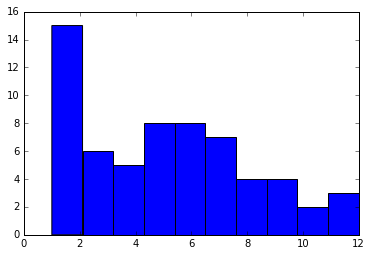

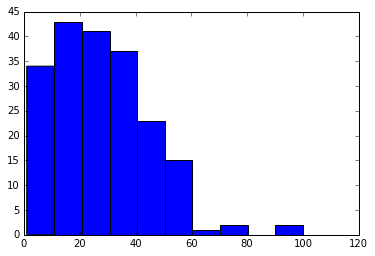

In [7]:
# ex IV.2

plt.hist (nx.degree(Gd).values())
plt.show ()

plt.hist (nx.degree(Gj).values())
plt.show ()

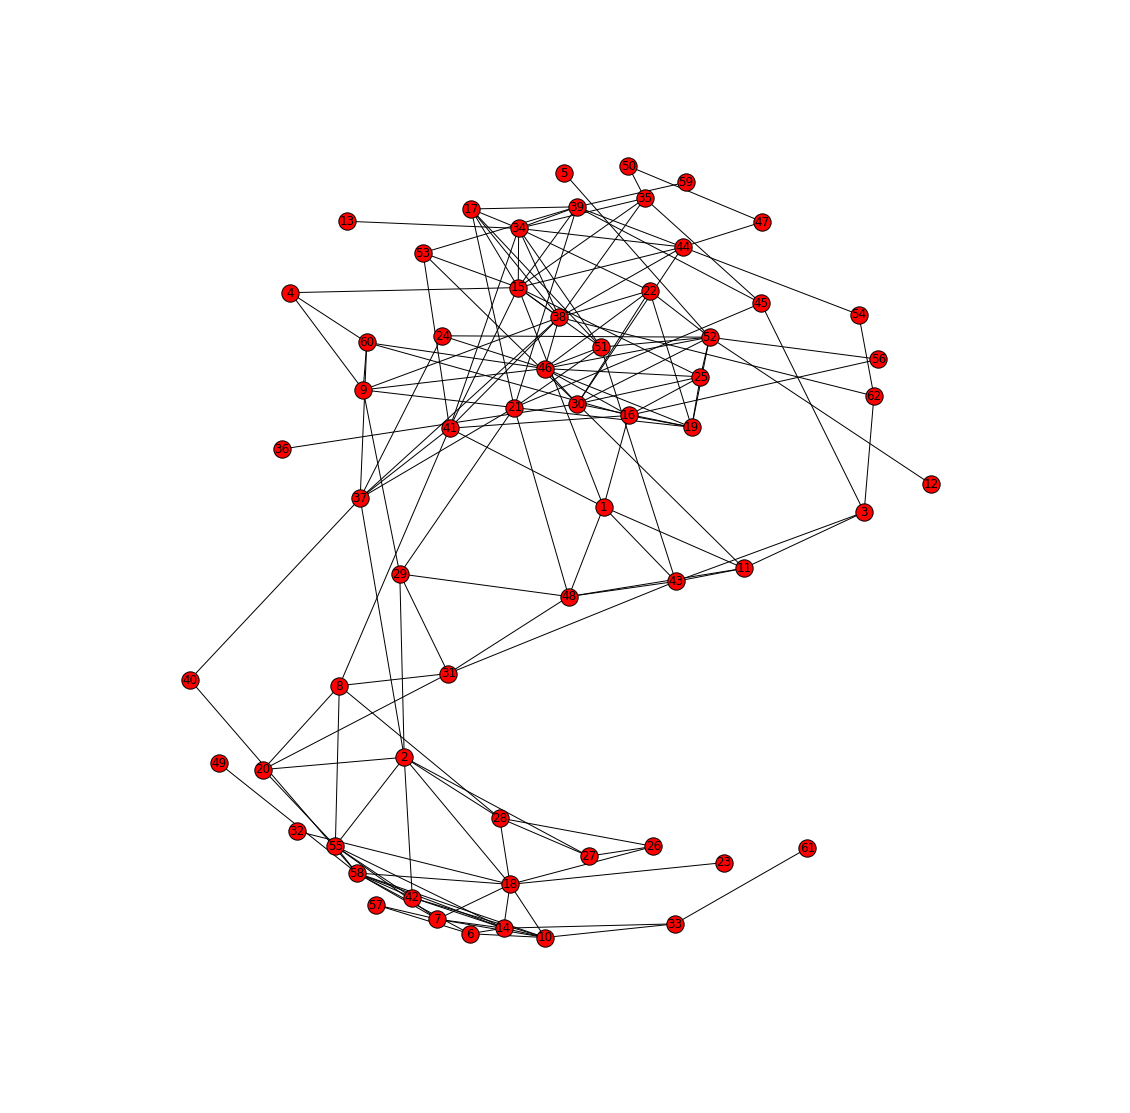

['61', u'33', u'10', u'58', u'40']


In [25]:
# ex IV.3

def drawGraph (G, pos = None):
    plt.figure (figsize=(15,15))
    if not pos:
        pos = nx.spring_layout(G)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos) 
    plt.show()

drawGraph (Gd)
print nx.dijkstra_path(Gd, '61', '40')

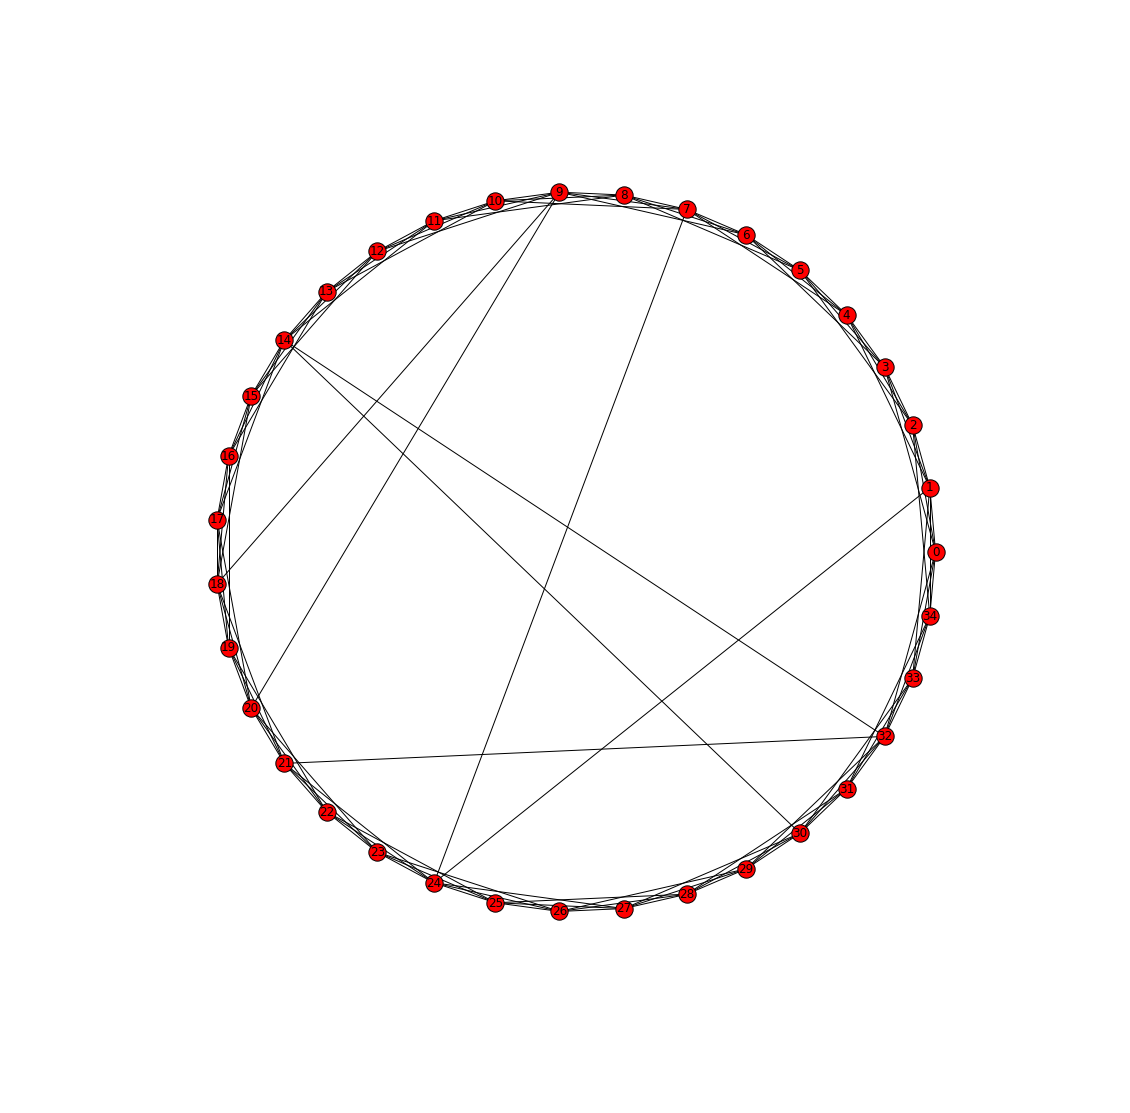

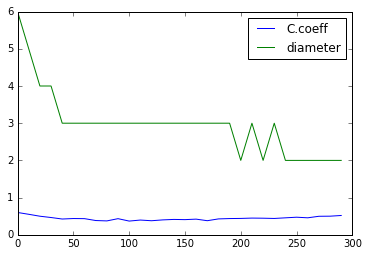

In [38]:
# ex. IV.4
import random

def genPair (nodesNumber):
    fr = random.randint (0, nodesNumber - 1)
    to = random.randint (0, nodesNumber - 1)
    if fr == to:
        return genPair (nodesNumber)
    return fr,to
    
def modelC (nodesNumber, k, shortcutsNumber, withoutDuplicates):
    G = nx.Graph ()
    for i in range (nodesNumber):
        for j in range (i + 1, i + k + 1):
            G.add_edge (i, j % nodesNumber)
    for i in range (shortcutsNumber):
        fr,to = genPair (nodesNumber)
        while withoutDuplicates and G.has_edge (fr, to):
            fr,to = genPair (nodesNumber)
        G.add_edge (fr, to)
            
    return G

N = 35
k = 3

G = modelC (N, k, 7, True)
drawGraph (G, pos = nx.circular_layout (G))


cc = []
diam = []
xs = []
for i in range (0, 300, 10):
    G = modelC (N, k, i, False)
    xs.append (i)
    cc.append (nx.average_clustering(G))
    diam.append (nx.diameter (G))
    
plt.plot (xs, cc, label='C.coeff')
plt.plot (xs, diam, label='diameter')
plt.legend ()
plt.show ()
               
    

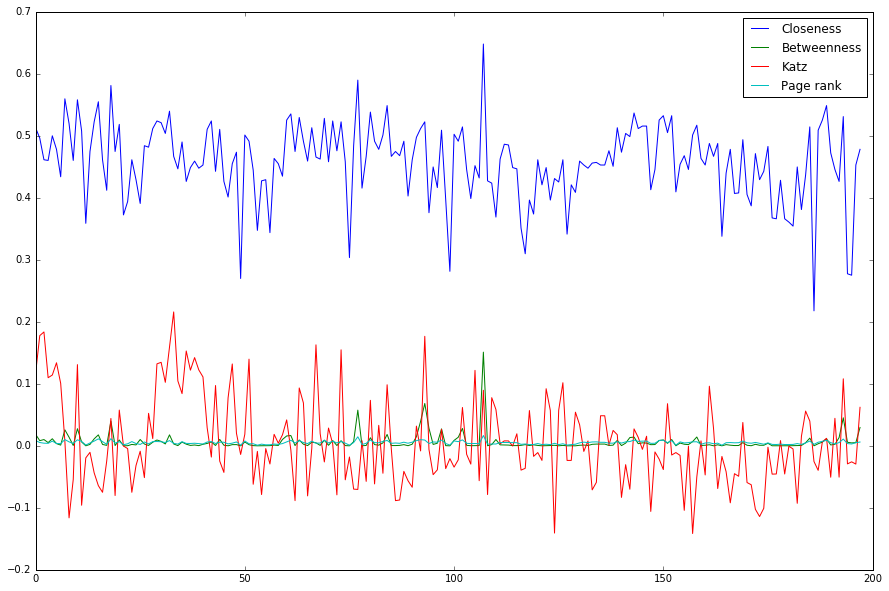

Closeness  vs  Betweenness : PearsonResult (0.47453331814710176, 1.6342620068504248e-12) SpearmanrResult(correlation=0.72963494651647565, pvalue=3.4748583202142741e-34)
Closeness  vs  Katz : PearsonResult (0.20478477202502912, 0.0038028695869661059) SpearmanrResult(correlation=0.19996111687774332, pvalue=0.0047358944468740578)
Closeness  vs  Page rank : PearsonResult (0.81043643555241895, 2.1288197004116951e-47) SpearmanrResult(correlation=0.85371322655076975, pvalue=1.911610840285114e-57)
Betweenness  vs  Katz : PearsonResult (0.21051726142770572, 0.0029116166993239535) SpearmanrResult(correlation=0.22927126443390083, pvalue=0.0011577248443293644)
Betweenness  vs  Page rank : PearsonResult (0.69085919919951566, 2.0107034333431322e-29) SpearmanrResult(correlation=0.80632452398257226, pvalue=1.4024132470407596e-46)
Katz  vs  Page rank : PearsonResult (0.10300944997636072, 0.14870001841518557) SpearmanrResult(correlation=0.069389509290125329, pvalue=0.33135597046309573)


In [53]:
# ex. IV.5

clC = nx.closeness_centrality (Gj)
bC = nx.betweenness_centrality (Gj)
kC = nx.katz_centrality_numpy (Gj)
prC = nx.pagerank (Gj)

keys = Gj.nodes ()
correlations = [[clC[k] for k in keys], [bC[k] for k in keys], [kC[k] for k in keys], [prC[k] for k in keys]]
names = ['Closeness', 'Betweenness', 'Katz', 'Page rank']


plt.figure (figsize=(15,10))
for i in range (4):
    plt.plot (correlations[i], label = names[i])
plt.legend ()
plt.show ()

from scipy import stats


for i in range (4):
    for j in range (i + 1, 4):
        print names[i], ' vs ', names[j], ': PearsonResult', stats.pearsonr (correlations[i], correlations[j]), stats.spearmanr (correlations[i], correlations[j])

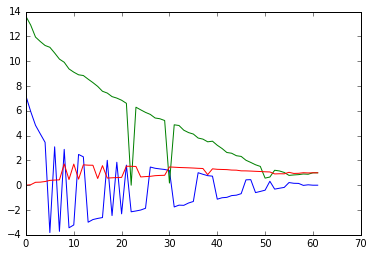

In [64]:
# ex IV.6

from numpy import linalg

A = nx.adjacency_matrix (Gd)
L = nx.laplacian_matrix (Gd)
NL = nx.normalized_laplacian_matrix (Gd)

plt.plot (linalg.eigvals (A.todense ()), label = 'A')
plt.plot (linalg.eigvals (L.todense ()), label = 'L')
plt.plot (linalg.eigvals (NL.todense ()), label = 'NL')
plt.show ()